In [1]:
import numpy as np
from tensorflow.keras.models import Model, Sequential
from keras.layers import (
    GlobalMaxPooling2D,
    Dense,
    Input,
)

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    f1_score,
)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob as gb
import cv2
from tqdm import tqdm
from collections import Counter
from sklearn.model_selection import train_test_split
from keras.applications import resnet

In [2]:
shape = (150, 150, 3)
image_size = 150
path = "./Images/"

In [3]:
def read_images_from_directory(
    folder_path,
    desc,
):
    images = []
    labels = []

    for folder in os.listdir(folder_path):
        files = gb.glob(pathname=str(folder_path + "/" + folder + "/*.jpg"))

        for file in tqdm(files, desc=desc + " in " + folder):
            image = plt.imread(file)
            img_resized = cv2.resize(image, (image_size, image_size))
            img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
            images.append(img_rgb)
            labels.append(folder)
    print(labels)
    return images, labels

In [4]:
x, y = read_images_from_directory(path, "Loading Data")

Loading Data in pituitary_tumor: 100%|██████████| 4504/4504 [00:20<00:00, 218.20it/s]

['glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'glioma

In [5]:
x = np.array(x)

In [6]:
# Preprocess labels: convert to one-hot encoding
lb = LabelBinarizer()
y = lb.fit_transform(y)
print(y)

[[1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 ...
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]]


In [7]:
x_temp, x_test, y_temp, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(
    x_temp, y_temp, test_size=0.25, random_state=42
)

In [8]:
print(len(x_train))  # 60%
print(len(x_val))  # 20%
print(len(x_test))  # 20%

11290
3764
3764


In [9]:
model = Sequential()
model.add(Input(shape=shape))

ResNettt101 = resnet.ResNet101(weights="imagenet", include_top=False, input_shape=shape)

for layer in ResNettt101.layers:
    layer.trainable = False

model.add(ResNettt101)
model.add(GlobalMaxPooling2D())
model.add(Dense(512, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 5, 5, 2048)        42658176  
                                                                 
 global_max_pooling2d (Globa  (None, 2048)             0         
 lMaxPooling2D)                                                  
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 43,709,316
Trainable params: 1,051,140
Non-trainable params: 42,658,176
_________________________________________________________________


In [10]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [11]:
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size=32,
)

Epoch 1/10
353/353 [==============================] - 63s 146ms/step - loss: 1.3508 - accuracy: 0.7740 - val_loss: 0.3696 - val_accuracy: 0.8560
Epoch 2/10
353/353 [==============================] - 48s 137ms/step - loss: 0.3051 - accuracy: 0.8848 - val_loss: 0.3175 - val_accuracy: 0.8866
Epoch 3/10
353/353 [==============================] - 49s 139ms/step - loss: 0.2225 - accuracy: 0.9136 - val_loss: 0.2999 - val_accuracy: 0.9020
Epoch 4/10
353/353 [==============================] - 51s 145ms/step - loss: 0.1636 - accuracy: 0.9379 - val_loss: 0.2340 - val_accuracy: 0.9142
Epoch 5/10
353/353 [==============================] - 51s 144ms/step - loss: 0.1443 - accuracy: 0.9452 - val_loss: 0.2646 - val_accuracy: 0.9038
Epoch 6/10
353/353 [==============================] - 51s 144ms/step - loss: 0.1205 - accuracy: 0.9539 - val_loss: 0.2116 - val_accuracy: 0.9259
Epoch 7/10
353/353 [==============================] - 50s 143ms/step - loss: 0.1187 - accuracy: 0.9572 - val_loss: 0.2442 - val_ac

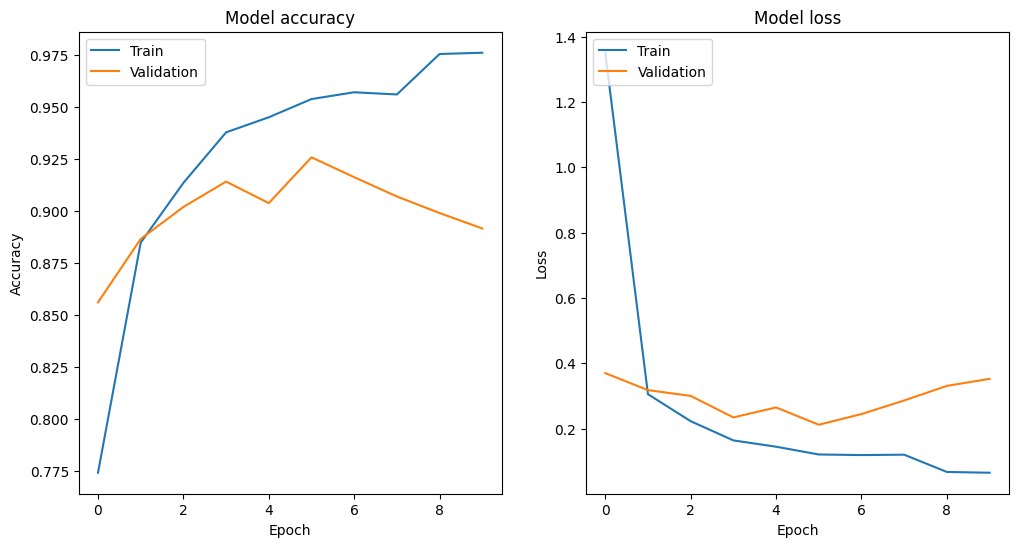

In [12]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")

118/118 [==============================] - 13s 107ms/step - loss: 0.3774 - accuracy: 0.8882
Test accuracy: 0.8881509304046631
Test loss: 0.3774102032184601


In [14]:
# Make predictions on the test set
y_pred_probs = model.predict(x_test)

y_pred = np.argmax(y_pred_probs, axis=1)

y_true = np.argmax(y_test, axis=1)

118/118 [==============================] - 14s 101ms/step


In [15]:
conf_matrix = confusion_matrix(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)


precision = precision_score(y_true, y_pred, average="weighted")


recall = recall_score(y_true, y_pred, average="weighted")


f1 = f1_score(y_true, y_pred, average="weighted")

In [16]:
print(f"Accuracy: {accuracy}")


print(f"Precision: {precision}")


print(f"Recall: {recall}")


print(f"F1 Score: {f1}")

Accuracy: 0.8881509032943677
Precision: 0.9001053797662911
Recall: 0.8881509032943677
F1 Score: 0.8904947953034764


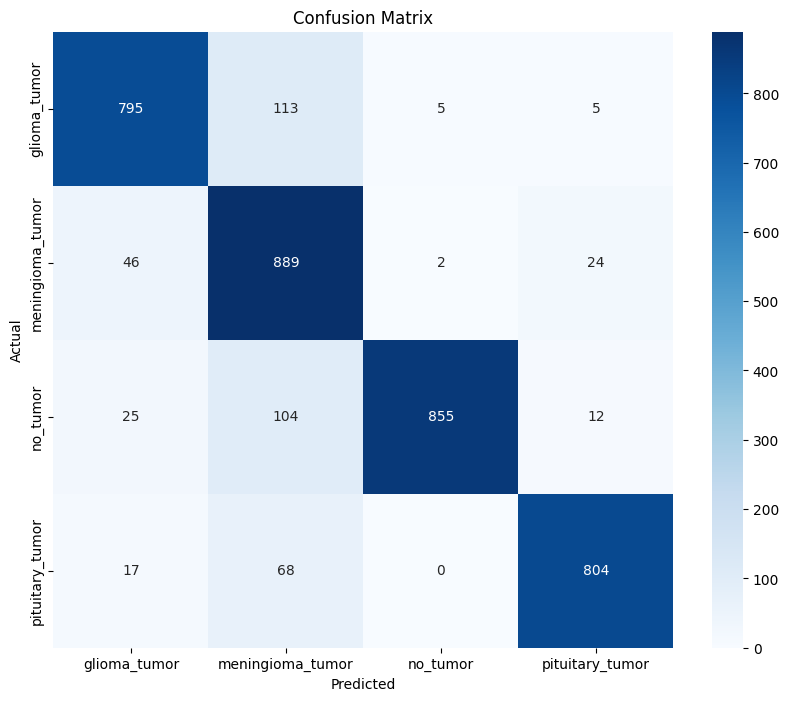

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=lb.classes_,
    yticklabels=lb.classes_,
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [18]:
model_directory = "Models"
if not os.path.exists(model_directory):
    os.makedirs(model_directory)
model_path = os.path.join(model_directory, "ResNet101_01(150x150).h5")
model.save(model_path)
print(f"Model saved to {model_path}")

Model saved to Models\ResNet101_01(150x150).h5


In [19]:
model = Sequential()
model.add(Input(shape=shape))

ResNettt101 = resnet.ResNet101(weights="imagenet", include_top=False, input_shape=shape)

model.add(ResNettt101)
model.add(GlobalMaxPooling2D())
model.add(Dense(512, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [20]:
model.summary()
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 5, 5, 2048)        42658176  
                                                                 
 global_max_pooling2d_1 (Glo  (None, 2048)             0         
 balMaxPooling2D)                                                
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 43,709,316
Trainable params: 43,603,972
Non-trainable params: 105,344
_________________________________________________________________


In [21]:
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size=32,
)

Epoch 1/10
353/353 [==============================] - 150s 384ms/step - loss: 1.1783 - accuracy: 0.7136 - val_loss: 1.1360 - val_accuracy: 0.6591
Epoch 2/10
353/353 [==============================] - 132s 374ms/step - loss: 0.4399 - accuracy: 0.8466 - val_loss: 2.4692 - val_accuracy: 0.4230
Epoch 3/10
353/353 [==============================] - 132s 374ms/step - loss: 0.5002 - accuracy: 0.8174 - val_loss: 36377.6289 - val_accuracy: 0.2452
Epoch 4/10
353/353 [==============================] - 132s 374ms/step - loss: 0.5902 - accuracy: 0.7743 - val_loss: 0.4766 - val_accuracy: 0.8308
Epoch 5/10
353/353 [==============================] - 132s 374ms/step - loss: 0.3426 - accuracy: 0.8714 - val_loss: 0.8642 - val_accuracy: 0.7341
Epoch 6/10
353/353 [==============================] - 132s 374ms/step - loss: 0.3984 - accuracy: 0.8535 - val_loss: 0.6471 - val_accuracy: 0.7941
Epoch 7/10
353/353 [==============================] - 132s 374ms/step - loss: 0.2928 - accuracy: 0.8923 - val_loss: 0.43

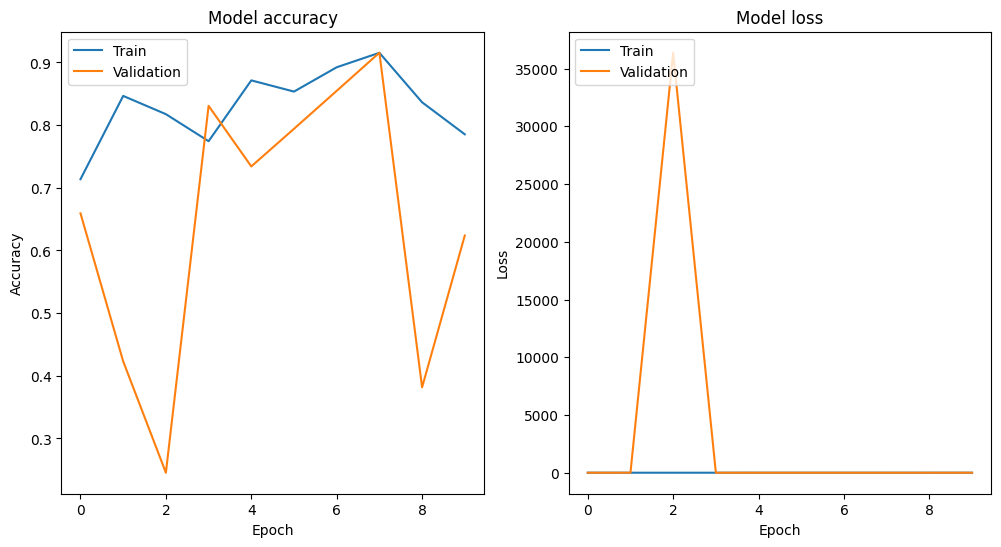

In [22]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

In [23]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")

118/118 [==============================] - 13s 107ms/step - loss: 1.0093 - accuracy: 0.6347
Test accuracy: 0.6346971392631531
Test loss: 1.009263038635254


In [24]:
# Make predictions on the test set
y_pred_probs = model.predict(x_test)

y_pred = np.argmax(y_pred_probs, axis=1)

y_true = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)

precision = precision_score(y_true, y_pred, average="weighted")

recall = recall_score(y_true, y_pred, average="weighted")

f1 = f1_score(y_true, y_pred, average="weighted")
print(f"Accuracy: {accuracy}")

print(f"Precision: {precision}")

print(f"Recall: {recall}")

print(f"F1 Score: {f1}")

118/118 [==============================] - 14s 101ms/step
Accuracy: 0.6346971307120085
Precision: 0.7596113422363235
Recall: 0.6346971307120085
F1 Score: 0.6100876523610893


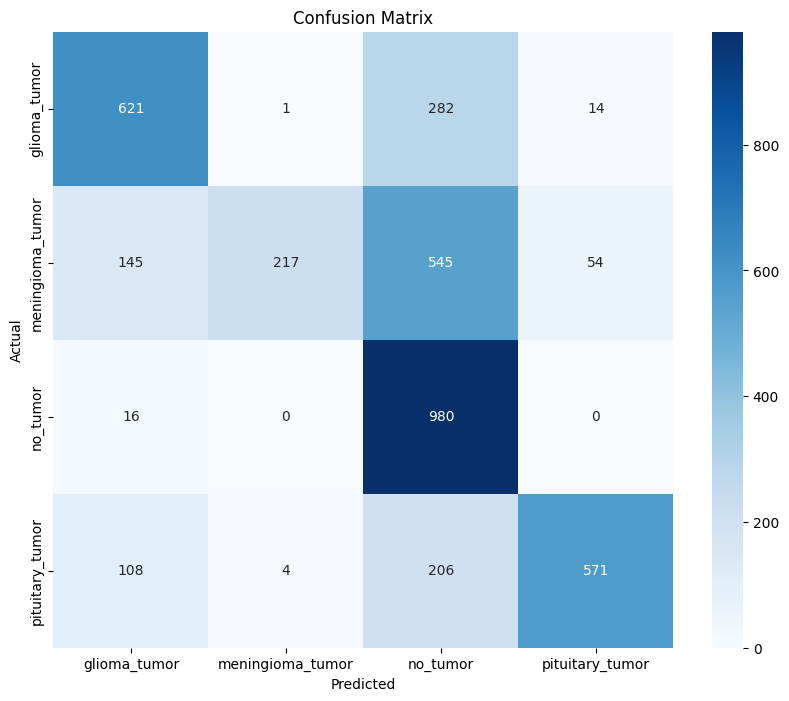

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=lb.classes_,
    yticklabels=lb.classes_,
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [26]:
model_directory = "Models"
if not os.path.exists(model_directory):
    os.makedirs(model_directory)
model_path = os.path.join(model_directory, "ResNet101_03(150x150).h5")
model.save(model_path)
print(f"Model saved to {model_path}")

Model saved to Models\ResNet101_03(150x150).h5
